In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
location = "Kickstartercombo.csv"
df = pd.read_csv(location)

df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [3]:
df.count()

Unnamed: 0          702411
ID                  702411
name                702403
main_category       702411
category            702411
country             702411
state               702411
goal                702411
pledged             702411
currency            702411
launched            702411
deadline            702411
backers             702411
usd pledged         694817
usd_goal_real       378661
usd_pledged_real    378661
dtype: int64

In [4]:
dupe = df.duplicated()
df.loc[dupe]

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real


In [5]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
name                     8
main_category            0
category                 0
country                  0
state                    0
goal                     0
pledged                  0
currency                 0
launched                 0
deadline                 0
backers                  0
usd pledged           7594
usd_goal_real       323750
usd_pledged_real    323750
dtype: int64

In [6]:
df.groupby(['main_category', 'state'])['goal','pledged'].count()

goal  pledged
main_category state                     
Art           canceled     4113     4113
              failed      26259    26259
              live          450      450
              successful  21187    21187
              suspended     168      168
Comics        canceled     1545     1545
              failed       7446     7446
              live          193      193
              successful  10349    10349
              suspended      42       42
Crafts        canceled     1525     1525
              failed      10340    10340
              live          218      218
              successful   3788     3788
              suspended     130      130
Dance         canceled      300      300
              failed       2326     2326
              live           50       50
              successful   4442     4442
              suspended      25       25
              undefined       2        2
Design        canceled     7278     7278
              failed      26877    26877
              live          856      856
              successful  18520    18520
              suspended     444      444
              undefined       4        4
Fashion       canceled     4780     4780
              failed      25703    25703
              live          585      585
...                         ...      ...
Music         canceled     6254     6254
              failed      40980    40980
              live          748      748
              successful  45985    45985
              suspended     275      275
              undefined    4468     4468
Photography   canceled     1873     1873
              failed      12144    12144
              live          134      134
              successful   6213     6213
              suspended     102      102
              undefined       2        2
Publishing    canceled     6700     6700
              failed      43150    43150
              live          748      748
              successful  22581    22581
              suspended     117      117
              undefined     924      924
Technology    canceled     8467     8467
              failed      36996    36996
              live         1012     1012
              successful  11502    11502
              suspended     747      747
              undefined       6        6
Theater       canceled     1155     1155
              failed       7051     7051
              live          107      107
              successful  12531    12531
              suspended      42       42
              undefined       2        2

[86 rows x 2 columns]

In [7]:
df.groupby(['main_category','state']).count()

Unnamed: 0     ID   name  category  country   goal  \
main_category state                                                            
Art           canceled          4113   4113   4113      4113     4113   4113   
              failed           26259  26259  26257     26259    26259  26259   
              live               450    450    450       450      450    450   
              successful       21187  21187  21187     21187    21187  21187   
              suspended          168    168    168       168      168    168   
Comics        canceled          1545   1545   1545      1545     1545   1545   
              failed            7446   7446   7446      7446     7446   7446   
              live               193    193    193       193      193    193   
              successful       10349  10349  10349     10349    10349  10349   
              suspended           42     42     42        42       42     42   
Crafts        canceled          1525   1525   1525      1525     1525   1525   
              failed           10340  10340  10340     10340    10340  10340   
              live               218    218    218       218      218    218   
              successful        3788   3788   3788      3788     3788   3788   
              suspended          130    130    130       130      130    130   
Dance         canceled           300    300    300       300      300    300   
              failed            2326   2326   2326      2326     2326   2326   
              live                50     50     50        50       50     50   
              successful        4442   4442   4442      4442     4442   4442   
              suspended           25     25     25        25       25     25   
              undefined            2      2      2         2        2      2   
Design        canceled          7278   7278   7278      7278     7278   7278   
              failed           26877  26877  26877     26877    26877  26877   
              live               856    856    856       856      856    856   
              successful       18520  18520  18520     18520    18520  18520   
              suspended          444    444    442       444      444    444   
              undefined            4      4      4         4        4      4   
Fashion       canceled          4780   4780   4780      4780     4780   4780   
              failed           25703  25703  25703     25703    25703  25703   
              live               585    585    585       585      585    585   
...                              ...    ...    ...       ...      ...    ...   
Music         canceled          6254   6254   6254      6254     6254   6254   
              failed           40980  40980  40980     40980    40980  40980   
              live               748    748    748       748      748    748   
              successful       45985  45985  45985     45985    45985  45985   
              suspended          275    275    275       275      275    275   
              undefined         4468   4468   4468      4468     4468   4468   
Photography   canceled          1873   1873   1873      1873     1873   1873   
              failed           12144  12144  12144     12144    12144  12144   
              live               134    134    134       134      134    134   
              successful        6213   6213   6213      6213     6213   6213   
              suspended          102    102    102       102      102    102   
              undefined            2      2      2         2        2      2   
Publishing    canceled          6700   6700   6700      6700     6700   6700   
              failed           43150  43150  43150     43150    43150  43150   
              live               748    748    748       748      748    748   
              successful       22581  22581  22581     22581    22581  22581   
              suspended          117    117    117       117      117    117   
              undefined   

In [8]:
df=df.loc[df['main_category']=='Food']
df

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.000000,NaN,NaN
5,5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.000000,NaN,NaN
6,6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,25000.0,453.0,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40,453.000000,NaN,NaN
17,17,1000071625,Boco Tea,Food,Food,US,failed,5000.0,1781.0,USD,2012-05-03 17:24:00,2012-06-02 17:24:00,40,1781.000000,NaN,NaN
20,20,1000087442,Mountain brew: A quest for alcohol sustainability,Food,Drinks,NO,failed,500.0,48.0,NOK,2015-01-26 19:17:00,2015-02-25 19:17:00,3,6.180008,NaN,NaN
26,26,1000115172,Daily Brew Coffee,Food,Food Trucks,GB,failed,3500.0,21.0,GBP,2015-03-01 18:06:00,2015-03-31 18:06:00,1,32.415261,NaN,NaN
39,39,1000183112,Hot Chicken Takes Over.,Food,Restaurants,US,successful,40000.0,63401.0,USD,2014-09-16 02:31:00,2014-10-16 05:59:00,855,63401.000000,NaN,NaN
47,47,1000217634,Mobile barbecue & catering trailer,Food,Food Trucks,US,failed,13750.0,1.0,USD,2014-09-24 03:35:00,2014-10-23 20:29:00,1,1.000000,NaN,NaN
55,55,1000235643,HIIT Bottle,Food,Drinks,US,successful,15000.0,124998.0,USD,2015-03-13 18:33:00,2015-04-27 19:33:00,2784,124998.000000,NaN,NaN
65,65,1000282287,Babe Ruth's Family Kitchen - Gourmet Hot Dogs ...,Food,Food,US,canceled,25000.0,0.0,USD,2015-09-08 00:59:00,2015-10-13 00:59:00,0,0.000000,NaN,NaN


In [9]:
df2=df.drop(['Unnamed: 0','usd pledged', 'usd_goal_real','usd_pledged_real'], axis =1)
df2

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,25000.0,453.0,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40
17,1000071625,Boco Tea,Food,Food,US,failed,5000.0,1781.0,USD,2012-05-03 17:24:00,2012-06-02 17:24:00,40
20,1000087442,Mountain brew: A quest for alcohol sustainability,Food,Drinks,NO,failed,500.0,48.0,NOK,2015-01-26 19:17:00,2015-02-25 19:17:00,3
26,1000115172,Daily Brew Coffee,Food,Food Trucks,GB,failed,3500.0,21.0,GBP,2015-03-01 18:06:00,2015-03-31 18:06:00,1
39,1000183112,Hot Chicken Takes Over.,Food,Restaurants,US,successful,40000.0,63401.0,USD,2014-09-16 02:31:00,2014-10-16 05:59:00,855
47,1000217634,Mobile barbecue & catering trailer,Food,Food Trucks,US,failed,13750.0,1.0,USD,2014-09-24 03:35:00,2014-10-23 20:29:00,1
55,1000235643,HIIT Bottle,Food,Drinks,US,successful,15000.0,124998.0,USD,2015-03-13 18:33:00,2015-04-27 19:33:00,2784
65,1000282287,Babe Ruth's Family Kitchen - Gourmet Hot Dogs ...,Food,Food,US,canceled,25000.0,0.0,USD,2015-09-08 00:59:00,2015-10-13 00:59:00,0


In [10]:
df2.groupby(['state']).count()

,ID,name,main_category,category,country,goal,pledged,currency,launched,deadline,backers
state,,,,,,,,,,,
canceled,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146
failed,29601,29601,29601,29601,29601,29601,29601,29601,29601,29601,29601
live,464,464,464,464,464,464,464,464,464,464,464
successful,11352,11352,11352,11352,11352,11352,11352,11352,11352,11352,11352
suspended,281,281,281,281,281,281,281,281,281,281,281


In [11]:
df.sum()
df

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.000000,NaN,NaN
5,5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.000000,NaN,NaN
6,6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,25000.0,453.0,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40,453.000000,NaN,NaN
17,17,1000071625,Boco Tea,Food,Food,US,failed,5000.0,1781.0,USD,2012-05-03 17:24:00,2012-06-02 17:24:00,40,1781.000000,NaN,NaN
20,20,1000087442,Mountain brew: A quest for alcohol sustainability,Food,Drinks,NO,failed,500.0,48.0,NOK,2015-01-26 19:17:00,2015-02-25 19:17:00,3,6.180008,NaN,NaN
26,26,1000115172,Daily Brew Coffee,Food,Food Trucks,GB,failed,3500.0,21.0,GBP,2015-03-01 18:06:00,2015-03-31 18:06:00,1,32.415261,NaN,NaN
39,39,1000183112,Hot Chicken Takes Over.,Food,Restaurants,US,successful,40000.0,63401.0,USD,2014-09-16 02:31:00,2014-10-16 05:59:00,855,63401.000000,NaN,NaN
47,47,1000217634,Mobile barbecue & catering trailer,Food,Food Trucks,US,failed,13750.0,1.0,USD,2014-09-24 03:35:00,2014-10-23 20:29:00,1,1.000000,NaN,NaN
55,55,1000235643,HIIT Bottle,Food,Drinks,US,successful,15000.0,124998.0,USD,2015-03-13 18:33:00,2015-04-27 19:33:00,2784,124998.000000,NaN,NaN
65,65,1000282287,Babe Ruth's Family Kitchen - Gourmet Hot Dogs ...,Food,Food,US,canceled,25000.0,0.0,USD,2015-09-08 00:59:00,2015-10-13 00:59:00,0,0.000000,NaN,NaN


In [13]:
df=df.drop(['Unnamed: 0','usd pledged', 'usd_goal_real','usd_pledged_real'], axis =1)
df

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,25000.0,453.0,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40
17,1000071625,Boco Tea,Food,Food,US,failed,5000.0,1781.0,USD,2012-05-03 17:24:00,2012-06-02 17:24:00,40
20,1000087442,Mountain brew: A quest for alcohol sustainability,Food,Drinks,NO,failed,500.0,48.0,NOK,2015-01-26 19:17:00,2015-02-25 19:17:00,3
26,1000115172,Daily Brew Coffee,Food,Food Trucks,GB,failed,3500.0,21.0,GBP,2015-03-01 18:06:00,2015-03-31 18:06:00,1
39,1000183112,Hot Chicken Takes Over.,Food,Restaurants,US,successful,40000.0,63401.0,USD,2014-09-16 02:31:00,2014-10-16 05:59:00,855
47,1000217634,Mobile barbecue & catering trailer,Food,Food Trucks,US,failed,13750.0,1.0,USD,2014-09-24 03:35:00,2014-10-23 20:29:00,1
55,1000235643,HIIT Bottle,Food,Drinks,US,successful,15000.0,124998.0,USD,2015-03-13 18:33:00,2015-04-27 19:33:00,2784
65,1000282287,Babe Ruth's Family Kitchen - Gourmet Hot Dogs ...,Food,Food,US,canceled,25000.0,0.0,USD,2015-09-08 00:59:00,2015-10-13 00:59:00,0


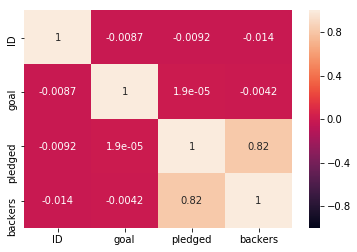

In [27]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [15]:
import statsmodels.formula.api as smf

In [20]:
result = smf.ols('pledged ~ backers', data=df).fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pledged   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 4.644e+04
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:10:52   Log-Likelihood:            -5.1435e+05
No. Observations:               45844   AIC:                         1.029e+06
Df Residuals:                   45841   BIC:                         1.029e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.9699     86.155     -1.009      0.313    -255.836      81.896
backers       97.6787      0.321    304.750      0.000      97.051      98.307
goal           0.0001   8.53e-05      1.275      0.202   -5.84e-05       0.000
==============================================================================
Omnibus:                   103739.270   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5758235508.386
Skew:                          20.643   Prob(JB):                         0.00
Kurtosis:                    1738.746   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

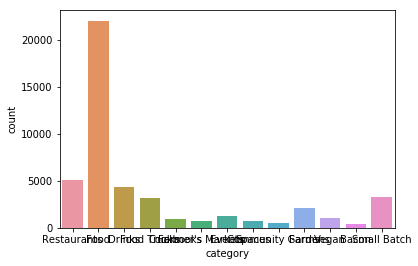

In [21]:
sns.countplot(x='category', data=df)

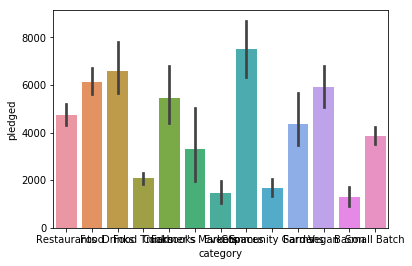

In [22]:
sns.barplot('category', 'pledged', data=df)

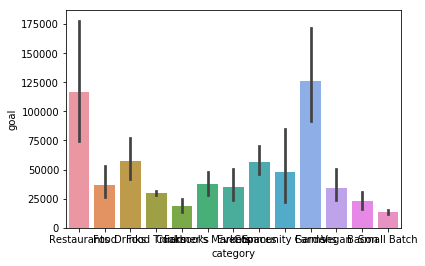

In [23]:
sns.barplot('category', 'goal', data=df)

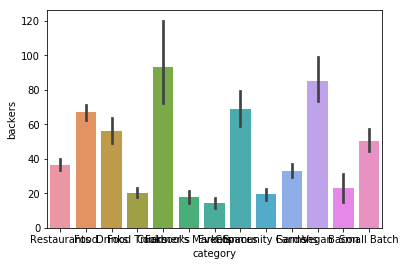

In [24]:
sns.barplot('category', 'backers', data=df)

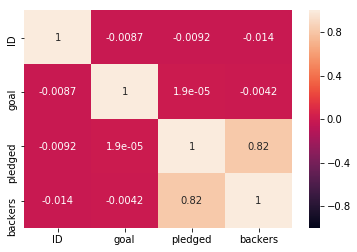

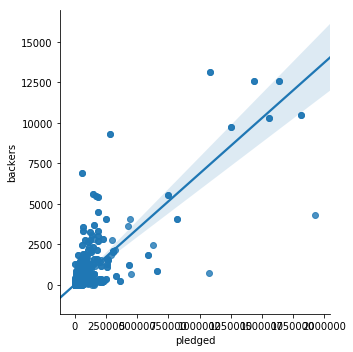

In [28]:
sns.lmplot(x='pledged', y='backers', data=df)

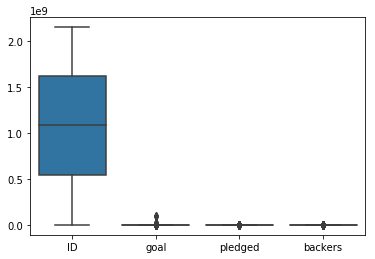

In [29]:
sns.boxplot(data=df)

In [36]:
stats_df = df.drop(['ID', 'goal'], axis=1)
stats_df.head()

,name,main_category,category,country,state,pledged,currency,launched,deadline,backers
4,Monarch Espresso Bar,Food,Restaurants,US,successful,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16
6,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,453.0,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40
17,Boco Tea,Food,Food,US,failed,1781.0,USD,2012-05-03 17:24:00,2012-06-02 17:24:00,40
20,Mountain brew: A quest for alcohol sustainability,Food,Drinks,NO,failed,48.0,NOK,2015-01-26 19:17:00,2015-02-25 19:17:00,3


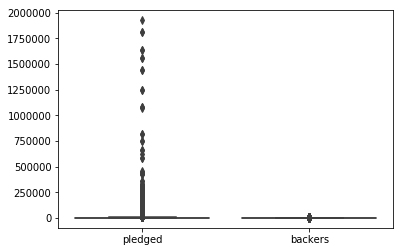

In [37]:
sns.boxplot(data=stats_df)

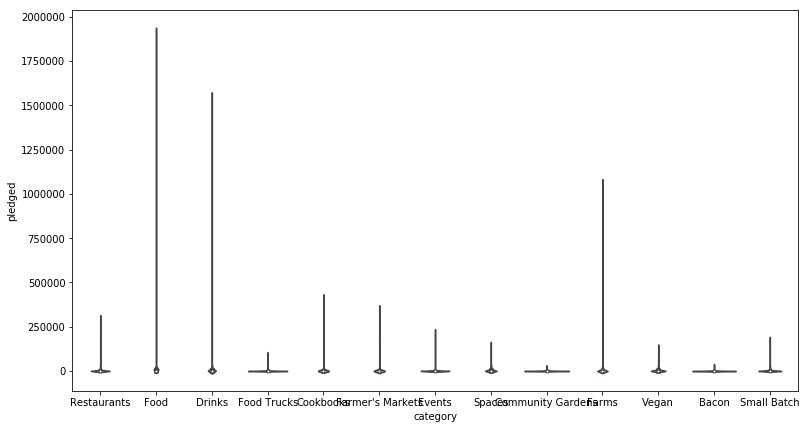

In [41]:
plt.subplots(figsize=(13,7))


#violin plot shows the distribution of attack power for each type
sns.violinplot(x='category', y='pledged', data=df)

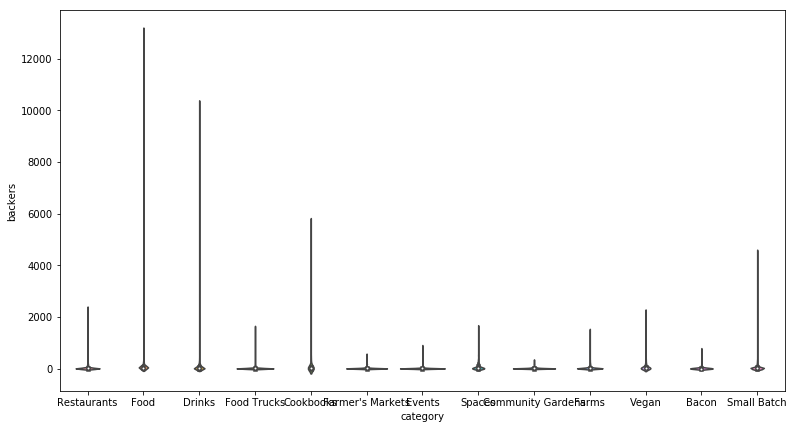

In [42]:
plt.subplots(figsize=(13,7))


#violin plot shows the distribution of attack power for each type
sns.violinplot(x='category', y='backers', data=df)

In [50]:
from sklearn.linear_model import LinearRegression

X = df.drop(['goal'], axis=1)

lm = LinearRegression()

lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lm.fit(X, df.goal)

ValueError: could not convert string to float: '2017-04-19'